데이터 전처리 과정
==================



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
path = '../csv/new추정매출-행정동.csv'
df = pd.read_csv(path, encoding = 'cp949')
pd.options.display.float_format = '{:}'.format
df.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20231,11680510,신사동,CS100001,한식음식점,30181557797.0,614725,22786703966.0,7394853831.0,3752980372,...,186505,96729,286567,236416,4262,136129,162991,90912,77097,51598
1,20231,11680510,신사동,CS100002,중식음식점,2593729494.0,72753,2060224681.0,533504813.0,316882237,...,21882,3127,37387,23850,531,12756,17155,12843,10175,7781
2,20231,11680510,신사동,CS100003,일식음식점,15551873378.0,254265,11116106010.0,4435767368.0,1775219050,...,95221,55950,113831,115150,4243,84496,78384,29263,23351,9237
3,20231,11680510,신사동,CS100004,양식음식점,12475463941.0,266176,8043890458.0,4431573483.0,1152773395,...,84638,32850,93085,146875,5170,91366,77244,31445,25751,9000
4,20231,11680510,신사동,CS100005,제과점,1976155901.0,129017,1276902401.0,699253500.0,210269110,...,43927,3310,37446,84519,1621,45585,35159,18204,13395,8002


데이터프레임 결측치 확인
======================

In [4]:
# 데이터프레임의 결측치를 확인
missing = df.isnull().sum()
print('결측치 확인')
print(missing)

결측치 확인
기준_년분기_코드          0
행정동_코드             0
행정동_코드_명           0
서비스_업종_코드          0
서비스_업종_코드_명        0
당월_매출_금액           0
당월_매출_건수           0
주중_매출_금액           0
주말_매출_금액           0
월요일_매출_금액          0
화요일_매출_금액          0
수요일_매출_금액          0
목요일_매출_금액          0
금요일_매출_금액          0
토요일_매출_금액          0
일요일_매출_금액          0
시간대_00~06_매출_금액    0
시간대_06~11_매출_금액    0
시간대_11~14_매출_금액    0
시간대_14~17_매출_금액    0
시간대_17~21_매출_금액    0
시간대_21~24_매출_금액    0
남성_매출_금액           0
여성_매출_금액           0
연령대_10_매출_금액       0
연령대_20_매출_금액       0
연령대_30_매출_금액       0
연령대_40_매출_금액       0
연령대_50_매출_금액       0
연령대_60_이상_매출_금액    0
주중_매출_건수           0
주말_매출_건수           0
월요일_매출_건수          0
화요일_매출_건수          0
수요일_매출_건수          0
목요일_매출_건수          0
금요일_매출_건수          0
토요일_매출_건수          0
일요일_매출_건수          0
시간대_건수~06_매출_건수    0
시간대_건수~11_매출_건수    0
시간대_건수~14_매출_건수    0
시간대_건수~17_매출_건수    0
시간대_건수~21_매출_건수    0
시간대_건수~24_매출_건수    0
남성_매출_건수           0
여성_매출_건수           0
연령대_10

이상치 확인
==========

In [5]:
# 이상치를 확인할 열 선택
columns_check = ['당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액', '남성_매출_금액', '여성_매출_금액']

# 이상치 확인을 위한 기준 설정 (표준편차의 몇 배수를 이상치로 간주할지)
threshold = 3

# 이상치 확인 함수
def detect_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    outliers = df[(df[column] - mean).abs() > threshold * std]
    return outliers

# 모든 열별로 이상치 확인
for col in columns_check:
    outliers = detect_outliers(df, col)
    if not outliers.empty:
        print(f"{col} 열의 이상치:")
        print(outliers)
    else:
        print(f"{col} 열에 이상치가 없습니다.")

당월_매출_금액 열의 이상치:
     기준_년분기_코드    행정동_코드 행정동_코드_명 서비스_업종_코드 서비스_업종_코드_명       당월_매출_금액  \
10       20231  11680521     논현1동  CS100001       한식음식점  41442906196.0   
20       20231  11680531     논현2동  CS100001       한식음식점  53549886010.0   
50       20231  11680580     삼성1동  CS100001       한식음식점  49531697911.0   
89       20231  11680630     대치4동  CS100001       한식음식점  42069532949.0   
99       20231  11680640     역삼1동  CS100001       한식음식점 117818000000.0   
208      20232  11680531     논현2동  CS100001       한식음식점  51702755727.0   
238      20232  11680580     삼성1동  CS100001       한식음식점  49907664873.0   
277      20232  11680630     대치4동  CS100001       한식음식점  41796795683.0   
287      20232  11680640     역삼1동  CS100001       한식음식점 110814000000.0   
397      20233  11680531     논현2동  CS100001       한식음식점  50458110159.0   
427      20233  11680580     삼성1동  CS100001       한식음식점  44950326453.0   
466      20233  11680630     대치4동  CS100001       한식음식점  40612267326.0   
476      20233  11680

In [6]:
column_check = '당월_매출_금액'

for dong_code in df['행정동_코드'].unique():
    # 해당 동의 데이터를 선택
    dong_data = df[df['행정동_코드'] == dong_code]
    
    # 해당 동의 이상치 확인
    outliers = detect_outliers(dong_data, column_check)
    
    if not outliers.empty:
        print(f"{dong_code} 동의 {column_check} 열의 이상치:")
        print(outliers)
        # 이상치에 대한 처리를 여기에 추가할 수 있습니다.
    else:
        print(f"{dong_code} 동의 {column_check} 열에 이상치가 없습니다.") 

11680510 동의 당월_매출_금액 열에 이상치가 없습니다.
11680521 동의 당월_매출_금액 열의 이상치:
    기준_년분기_코드    행정동_코드 행정동_코드_명 서비스_업종_코드 서비스_업종_코드_명      당월_매출_금액  \
10      20231  11680521     논현1동  CS100001       한식음식점 41442906196.0   

    당월_매출_건수      주중_매출_금액     주말_매출_금액   월요일_매출_금액  ...  시간대_건수~21_매출_건수  \
10    869043 33078253574.0 8364652622.0  5546197979  ...           224287   

    시간대_건수~24_매출_건수  남성_매출_건수  여성_매출_건수  연령대_10_매출_건수  연령대_20_매출_건수  \
10           133017    442494    272563          1974        138863   

    연령대_30_매출_건수  연령대_40_매출_건수  연령대_50_매출_건수  연령대_60_이상_매출_건수  
10        237427        155299        113152            68323  

[1 rows x 53 columns]
11680531 동의 당월_매출_금액 열의 이상치:
    기준_년분기_코드    행정동_코드 행정동_코드_명 서비스_업종_코드 서비스_업종_코드_명      당월_매출_금액  \
20      20231  11680531     논현2동  CS100001       한식음식점 53549886010.0   

    당월_매출_건수      주중_매출_금액     주말_매출_금액   월요일_매출_금액  ...  시간대_건수~21_매출_건수  \
20   1147642 45082354150.0 8467531860.0  7986548484  ...           276054   

    시간대_건수~24

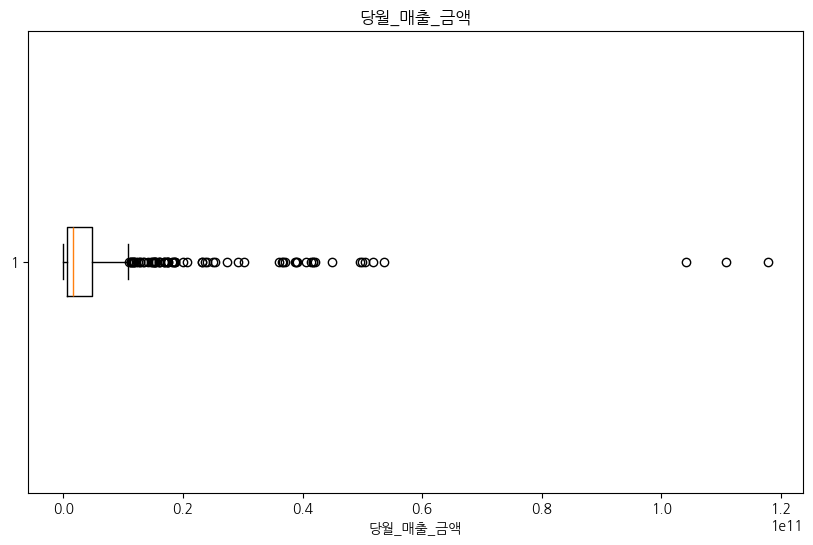

In [7]:
# 그림 그릴 열 선택
column_plot = '당월_매출_금액'

# 상자 그림 생성
plt.figure(figsize=(10, 6),dpi=100)
plt.rcParams['font.family'] = 'NanumGothic'
plt.boxplot(df[column_plot], vert=False)
plt.title(f'{column_plot}')
plt.xlabel(column_plot)
plt.show()

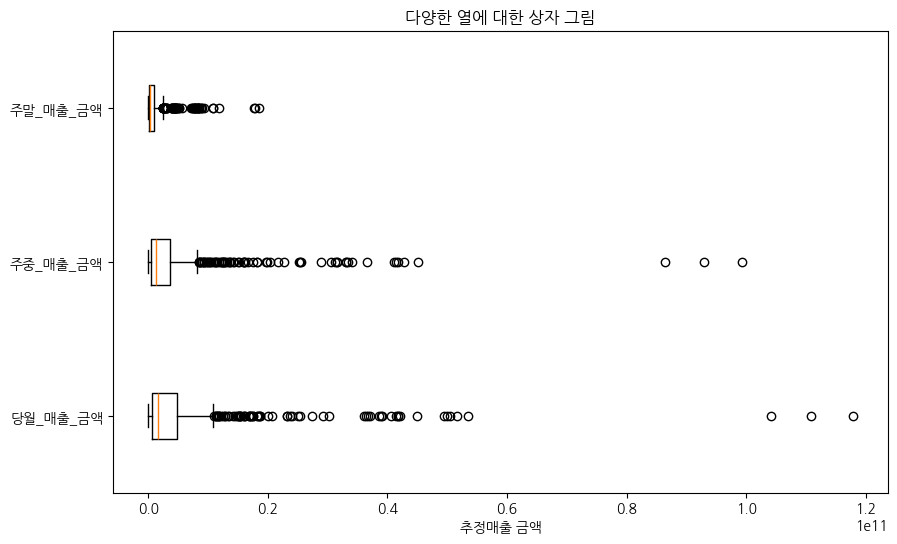

In [8]:

# 그림 그릴 열 선택
columns_plot = ['당월_매출_금액', '주중_매출_금액', '주말_매출_금액'] 

# 상자 그림 생성
plt.figure(figsize=(10, 6), dpi=100)
plt.rcParams['font.family'] = 'NanumGothic'

data_to_plot = df[columns_plot]
plt.boxplot(data_to_plot, vert=False)
plt.title('다양한 열에 대한 상자 그림')
plt.xlabel('추정매출 금액')
plt.yticks(range(1, len(columns_plot) + 1), columns_plot)  # y축 눈금 라벨 설정
plt.show()


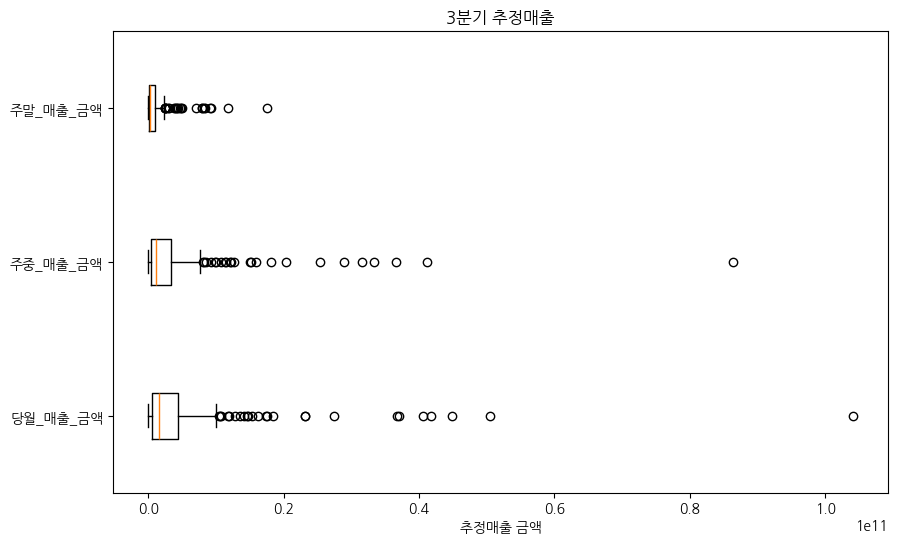

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = '../csv/new추정매출-행정동.csv'
data = pd.read_csv(path, encoding = 'cp949')

# 0분기 데이터만 추출
data_quarter = data[data['기준_년분기_코드'] == 20233]

# 그림 그릴 열 선택
columns_to_plot = ['당월_매출_금액', '주중_매출_금액', '주말_매출_금액']

# 상자 그림 생성
plt.figure(figsize=(10, 6), dpi=100)
plt.rcParams['font.family'] = 'NanumGothic'

data_to_plot = data_quarter[columns_to_plot]
plt.boxplot(data_to_plot, vert=False)
plt.title('3분기 추정매출')
plt.xlabel('추정매출 금액')
plt.yticks(range(1, len(columns_to_plot) + 1), columns_to_plot)  # y축 눈금 라벨 설정
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = '../csv/new추정매출-행정동.csv'
data = pd.read_csv(path, encoding = 'cp949')


data['행정동_코드_명'] = data['행정동_코드_명'].replace({'삼성1동': '삼성동', '삼성2동': '삼성동'})
data['행정동_코드_명'] = data['행정동_코드_명'].replace({'논현1동': '논현동', '논현2동': '논현동'})
data['행정동_코드_명'] = data['행정동_코드_명'].replace({'개포1동': '개포동', '개포2동': '개포동', '개포4동': '개포동'})
data['행정동_코드_명'] = data['행정동_코드_명'].replace({'대치1동': '대치동', '대치2동': '대치동', '대치4동': '대치동'})
data['행정동_코드_명'] = data['행정동_코드_명'].replace({'도곡1동': '도곡동', '도곡2동': '도곡동'})
data['행정동_코드_명'] = data['행정동_코드_명'].replace({'역삼1동': '역삼동', '역삼2동': '역삼동'})

data['합친_동_매출'] = data.loc[(data['행정동_코드_명'] == '삼성1동') | (data['행정동_코드_명'] == '삼성2동'), 
                           ['당월_매출_금액', '주중_매출_금액', '주말_매출_금액']].sum(axis=1)
print(data.head(10))


   기준_년분기_코드    행정동_코드 행정동_코드_명 서비스_업종_코드 서비스_업종_코드_명      당월_매출_금액  당월_매출_건수  \
0      20231  11680510      신사동  CS100001       한식음식점  3.018156e+10    614725   
1      20231  11680510      신사동  CS100002       중식음식점  2.593729e+09     72753   
2      20231  11680510      신사동  CS100003       일식음식점  1.555187e+10    254265   
3      20231  11680510      신사동  CS100004       양식음식점  1.247546e+10    266176   
4      20231  11680510      신사동  CS100005         제과점  1.976156e+09    129017   
5      20231  11680510      신사동  CS100006      패스트푸드점  1.462896e+09     67206   
6      20231  11680510      신사동  CS100007       치킨전문점  5.630757e+08     11557   
7      20231  11680510      신사동  CS100008       분식전문점  3.883373e+09    224950   
8      20231  11680510      신사동  CS100009     호프-간이주점  6.349757e+09    101730   
9      20231  11680510      신사동  CS100010       커피-음료  7.535265e+09    617733   

       주중_매출_금액      주말_매출_금액   월요일_매출_금액  ...  시간대_건수~24_매출_건수  남성_매출_건수  \
0  2.278670e+10  7.394854e+09  

1동 2동 하나로 묶기
==================

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = '../csv/new추정매출-행정동.csv'
data = pd.read_csv(path, encoding = 'cp949')

# 1동과 2동이 있는 동들의 리스트
combine_dongs = ['삼성','논현', '개포', '대치', '도곡', '역삼']

# 1동과 2동을 합쳐서 새로운 동을 만드는 함수를 정의
def combine_dong(dong):
    for d in combine_dongs:
        if d in dong:
            return d
    return dong

# 1동과 2동이 아닌 동들은 그대로 
def keep_original(dong):
    for d in combine_dongs:
        if d in dong:
            return None
    return dong

# 합쳐진 동들의 매출 금액을 합치는 함수를 정의
def combine_sales(group):
    return group[['당월_매출_금액', '주중_매출_금액', '주말_매출_금액']].sum()

# 새로운 열에 새로운 동을 할당
data['합쳐진_동'] = data['행정동_코드_명'].apply(combine_dong)

# 합쳐진 동에 대해 그룹화하고 매출 금액을 합침
combined_sales = data.groupby('합쳐진_동').apply(combine_sales)

# 새로운 열에 원래 동을 할당
data['원래_동'] = data['행정동_코드_명'].apply(keep_original)



# 변경된 데이터를 확인
print(data.head(10))


   기준_년분기_코드    행정동_코드 행정동_코드_명 서비스_업종_코드 서비스_업종_코드_명      당월_매출_금액  당월_매출_건수  \
0      20231  11680510      신사동  CS100001       한식음식점  3.018156e+10    614725   
1      20231  11680510      신사동  CS100002       중식음식점  2.593729e+09     72753   
2      20231  11680510      신사동  CS100003       일식음식점  1.555187e+10    254265   
3      20231  11680510      신사동  CS100004       양식음식점  1.247546e+10    266176   
4      20231  11680510      신사동  CS100005         제과점  1.976156e+09    129017   
5      20231  11680510      신사동  CS100006      패스트푸드점  1.462896e+09     67206   
6      20231  11680510      신사동  CS100007       치킨전문점  5.630757e+08     11557   
7      20231  11680510      신사동  CS100008       분식전문점  3.883373e+09    224950   
8      20231  11680510      신사동  CS100009     호프-간이주점  6.349757e+09    101730   
9      20231  11680510      신사동  CS100010       커피-음료  7.535265e+09    617733   

       주중_매출_금액      주말_매출_금액   월요일_매출_금액  ...  남성_매출_건수  여성_매출_건수  \
0  2.278670e+10  7.394854e+09  3752980

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준_년분기_코드        566 non-null    int64  
 1   행정동_코드           566 non-null    int64  
 2   행정동_코드_명         566 non-null    object 
 3   서비스_업종_코드        566 non-null    object 
 4   서비스_업종_코드_명      566 non-null    object 
 5   당월_매출_금액         566 non-null    float64
 6   당월_매출_건수         566 non-null    int64  
 7   주중_매출_금액         566 non-null    float64
 8   주말_매출_금액         566 non-null    float64
 9   월요일_매출_금액        566 non-null    int64  
 10  화요일_매출_금액        566 non-null    float64
 11  수요일_매출_금액        566 non-null    int64  
 12  목요일_매출_금액        566 non-null    int64  
 13  금요일_매출_금액        566 non-null    int64  
 14  토요일_매출_금액        566 non-null    float64
 15  일요일_매출_금액        566 non-null    float64
 16  시간대_00~06_매출_금액  566 non-null    int64  
 17  시간대_06~11_매출_금액 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = '../csv/new추정매출-행정동.csv'
data = pd.read_csv(path, encoding = 'cp949')

# 동 이름에서 숫자 부분을 제외하고 그룹화하는 함수를 정의
def combine_dong(dong):
    # 동 이름에서 숫자 부분을 제외한 문자열을 반환
    return ''.join(filter(str.isalpha, dong))

# 동별 음식점 종류를 고려하여 매출을 합치는 함수를 정의
def combine_sales_by_category(group):
    # 각 동의 음식점 종류를 그룹화하고 매출을 합침
    combined_sales = group.groupby('서비스_업종_코드_명')[['당월_매출_금액', '주중_매출_금액', '주말_매출_금액']].sum()
    return combined_sales

# 동 이름에서 숫자 부분을 제외하고 그룹화
data['합쳐진_동'] = data['행정동_코드_명'].apply(combine_dong)

# 각 동별 음식점 종류를 고려하여 매출을 합침
combined_sales_by_category = data.groupby(['합쳐진_동', '서비스_업종_코드_명']).apply(combine_sales_by_category)

# 변경된 데이터를 확인
print(combined_sales_by_category)

# 새로운 CSV 파일로 저장
combined_sales_by_category.to_csv('합쳐진_동_음식점_종류별_매출.csv', encoding='utf-8-sig')


                                   당월_매출_금액      주중_매출_금액      주말_매출_금액
합쳐진_동 서비스_업종_코드_명 서비스_업종_코드_명                                          
개포동   분식전문점       분식전문점        8.027283e+09  5.744430e+09  2.282853e+09
      양식음식점       양식음식점        9.548022e+07  8.132304e+07  1.415717e+07
      일식음식점       일식음식점        1.524687e+09  1.162763e+09  3.619240e+08
      제과점         제과점          1.290112e+09  9.568252e+08  3.332869e+08
      중식음식점       중식음식점        2.967676e+09  2.006321e+09  9.613555e+08
...                                     ...           ...           ...
청담동   치킨전문점       치킨전문점        1.697115e+09  1.325555e+09  3.715600e+08
      커피-음료       커피-음료        1.209461e+10  9.446346e+09  2.648260e+09
      패스트푸드점      패스트푸드점       1.301541e+09  9.184923e+08  3.830484e+08
      한식음식점       한식음식점        7.357269e+10  5.774357e+10  1.582911e+10
      호프-간이주점     호프-간이주점      1.024811e+10  7.533274e+09  2.714841e+09

[120 rows x 3 columns]


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = '../csv/new추정매출-행정동.csv'
data = pd.read_csv(path, encoding = 'cp949')

# 동 이름에서 숫자 부분을 제외하고 그룹화하는 함수를 정의
def combine_dong(dong):
    # 동 이름에서 숫자 부분을 제외한 문자열을 반환합니다.
    return ''.join(filter(str.isalpha, dong))

# 동별 음식점 종류를 고려하여 매출을 합치는 함수를 정의합니다.
def combine_sales_by_category(group):
    # 각 동의 음식점 종류를 그룹화하고 매출을 합칩니다.
    combined_sales = group.groupby(['서비스_업종_코드_명', '기준_년분기_코드'])[['당월_매출_금액', '주중_매출_금액', '주말_매출_금액']].sum()
    return combined_sales

# 동 이름에서 숫자 부분을 제외하고 그룹화합니다.
data['합쳐진_동'] = data['행정동_코드_명'].apply(combine_dong)

# 각 동별 음식점 종류를 고려하여 매출을 합칩니다.
combined_sales_by_category = data.groupby(['합쳐진_동', '서비스_업종_코드_명']).apply(combine_sales_by_category)

# 변경된 데이터를 확인합니다.
print(combined_sales_by_category)





                                             당월_매출_금액     주중_매출_금액    주말_매출_금액
합쳐진_동 서비스_업종_코드_명 서비스_업종_코드_명 기준_년분기_코드                                       
개포동   분식전문점       분식전문점       20231      2.963907e+09   2312158867   651748435
                              20232      2.718341e+09   1866698719   851642416
                              20233      2.345035e+09   1565572660   779461889
      양식음식점       양식음식점       20231      1.417315e+07     12630770     1542381
                              20232      1.508865e+07     13505924     1582725
...                                               ...          ...         ...
청담동   한식음식점       한식음식점       20232      2.531663e+10  19700049353  5616582361
                              20233      2.319967e+10  18152185736  5047486767
      호프-간이주점     호프-간이주점     20231      3.307094e+09   2387660914   919432594
                              20232      3.282805e+09   2425766714   857038511
                              20233      3.658216e+0

In [38]:
# 새로운 CSV 파일로 저장합니다.
combined_sales_by_category.to_csv('합쳐진_동_음식점_종류별_매출.csv', encoding='utf-8-sig')

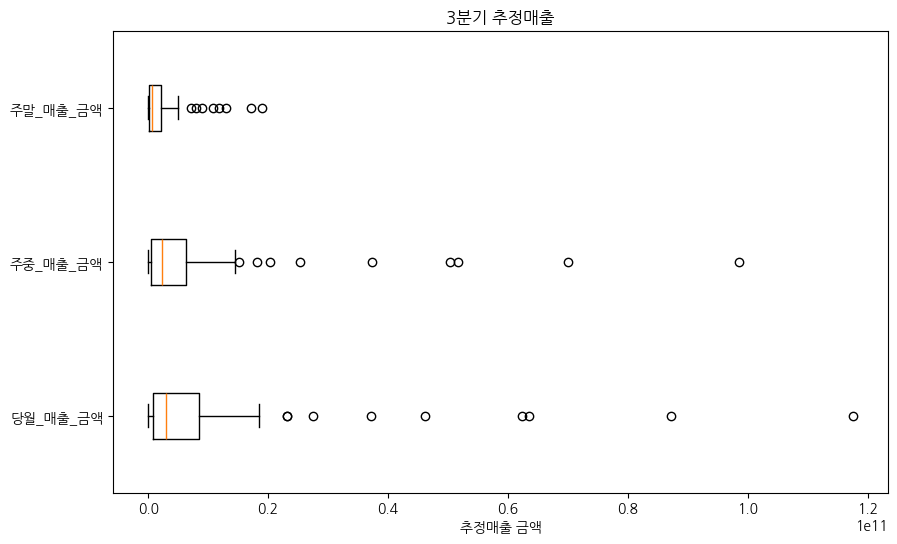

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = '../csv/합쳐진_동_음식점_종류별_매출.csv'
data = pd.read_csv(path, encoding = 'utf-8-sig')

# 0분기 데이터만 추출
data_quarter = data[data['기준_년분기_코드'] == 20233]

# 그림 그릴 열 선택
columns_to_plot = ['당월_매출_금액', '주중_매출_금액', '주말_매출_금액']

# 상자 그림 생성
plt.figure(figsize=(10, 6), dpi=100)
plt.rcParams['font.family'] = 'NanumGothic'

data_to_plot = data_quarter[columns_to_plot]
plt.boxplot(data_to_plot, vert=False)
plt.title('3분기 추정매출')
plt.xlabel('추정매출 금액')
plt.yticks(range(1, len(columns_to_plot) + 1), columns_to_plot)  # y축 눈금 라벨 설정
plt.show()

In [41]:

path = '../csv/합쳐진_동_음식점_종류별_매출.csv'
data = pd.read_csv(path, encoding = 'utf-8-sig')

# 이상치를 제거할 열 선택
column_clean = '당월_매출_금액'

# IQR 계산
Q1 = data[column_clean].quantile(0.25)
Q3 = data[column_clean].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
cleaned_data = data[(data[column_clean] >= lower_bound) & (data[column_clean] <= upper_bound)]

# 이상치 제거한 데이터 출력
print(cleaned_data)

    합쳐진_동 서비스_업종_코드_명 서비스_업종_코드_명.1  기준_년분기_코드      당월_매출_금액    주중_매출_금액  \
0     개포동       분식전문점         분식전문점      20231  2.963907e+09  2312158867   
1     개포동       분식전문점         분식전문점      20232  2.718341e+09  1866698719   
2     개포동       분식전문점         분식전문점      20233  2.345035e+09  1565572660   
3     개포동       양식음식점         양식음식점      20231  1.417315e+07    12630770   
4     개포동       양식음식점         양식음식점      20232  1.508865e+07    13505924   
..    ...         ...           ...        ...           ...         ...   
350   청담동      패스트푸드점        패스트푸드점      20232  4.430031e+08   314419555   
351   청담동      패스트푸드점        패스트푸드점      20233  4.326824e+08   300918388   
355   청담동     호프-간이주점       호프-간이주점      20231  3.307094e+09  2387660914   
356   청담동     호프-간이주점       호프-간이주점      20232  3.282805e+09  2425766714   
357   청담동     호프-간이주점       호프-간이주점      20233  3.658216e+09  2719845952   

      주말_매출_금액  
0    651748435  
1    851642416  
2    779461889  
3      1542381  
4 

다시 이상치 처리
==============

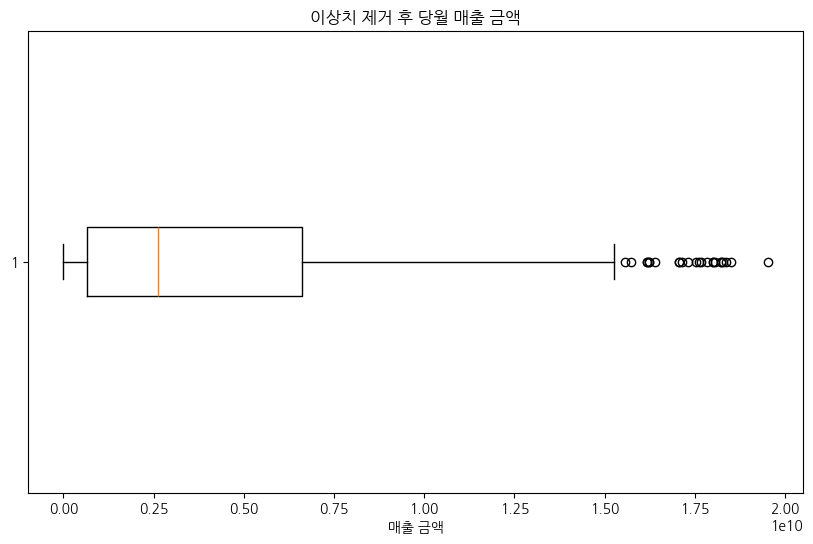

In [44]:
# 이상치를 제거한 후의 데이터를 사용한다고 가정합니다.
cleaned_data = data[(data[column_clean] >= lower_bound) & (data[column_clean] <= upper_bound)]

# 상자그림을 그릴 열 선택
column_plot = '당월_매출_금액'

# 상자그림 생성
plt.figure(figsize=(10, 6), dpi=100)
plt.rcParams['font.family'] = 'NanumGothic'

plt.boxplot(cleaned_data[column_plot], vert=False)
plt.title('이상치 제거 후 당월 매출 금액')
plt.xlabel('매출 금액')
plt.show()